PIGS ANALYSIS NOTEBOOK  
Patrick M. Donnelly  
University of Washington
September 20th, 2018  

In [1]:
# import necessary databases and libraries
import pycurl,json,requests,sys,os
import pandas as pd
import numpy as np
# existing redcap API stipulates StringIO, but pycurl now works with BytesIO
from io import BytesIO

In [2]:
# get api token
# if you need an access token, consult the RedCap API page
home = os.path.expanduser('~')
with open (home+"/Desktop/redcap_apitoken_repo.txt", "r") as myfile:
    token=myfile.read().split()

In [3]:
# say which report you want
# report 27719 is the report in the screening database called "pigs_data"
pigs_report = {
    'token': token,
    'content': 'report',
    'format': 'csv',
    'report_id': '27719',
    'rawOrLabel': 'raw',
    'rawOrLabelHeaders': 'raw',
    'exportCheckboxLabel': 'false',
    'returnFormat': 'csv'
}
intake_report = {
    'token': token,
    'content': 'report',
    'format': 'csv',
    'report_id': '20197',
    'rawOrLabel': 'raw',
    'rawOrLabelHeaders': 'raw',
    'exportCheckboxLabel': 'false',
    'returnFormat': 'csv'
}

In [4]:
# specify API address
redcap_path = 'https://redcap.iths.org/api/'
# use requests module to pull data from database using api token
# and convert to csv
pull_pigs = requests.post(redcap_path, data=pigs_report)
pull_intake = requests.post(redcap_path, data=intake_report)
pigs_report_filename =os.path.join(home+'/Downloads/pigs_data.csv')
intake_report_filename =os.path.join(home+'/Downloads/intake_data.csv')
with open(pigs_report_filename, 'w') as report_file:
        report_file.write(pull_pigs.text)
pigs_data = pd.read_csv(pigs_report_filename)
with open(intake_report_filename, 'w') as report_file:
        report_file.write(pull_intake.text)
intake_data = pd.read_csv(intake_report_filename)

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import numpy as np
from scipy.stats import linregress

In [6]:
for ii in range(0, len(pigs_data['record_id'])):
    if pigs_data['study_name'][ii] == 41 and (pigs_data['pigs_group'][ii] == 0 or pigs_data['pigs_group'][ii] == 2):
            pigs_data.loc[ii,'pigs_p1_r1_acc'] = pigs_data.loc[ii,'pigs_p1_r1_acc']/237
            pigs_data.loc[ii,'pigs_p1_r2_acc'] = pigs_data.loc[ii,'pigs_p1_r2_acc']/237
            pigs_data.loc[ii,'pigs_p2_r1_acc'] = pigs_data.loc[ii,'pigs_p2_r1_acc']/223
            pigs_data.loc[ii,'pigs_p2_r2_acc'] = pigs_data.loc[ii,'pigs_p2_r2_acc']/223
            pigs_data.loc[ii,'pigs_p3_r1_acc'] = pigs_data.loc[ii,'pigs_p3_r1_acc']/301
            pigs_data.loc[ii,'pigs_p3_r2_acc'] = pigs_data.loc[ii,'pigs_p3_r2_acc']/301
            pigs_data.loc[ii,'pigs_p4_r1_acc'] = pigs_data.loc[ii,'pigs_p4_r1_acc']/300
            pigs_data.loc[ii,'pigs_p4_r2_acc'] = pigs_data.loc[ii,'pigs_p4_r2_acc']/300
    elif pigs_data['study_name'][ii] == 41 and (pigs_data['pigs_group'][ii] == 1 or pigs_data['pigs_group'][ii] == 3):
            pigs_data.loc[ii,'pigs_p1_r1_acc'] = pigs_data.loc[ii,'pigs_p1_r1_acc']/301
            pigs_data.loc[ii,'pigs_p1_r2_acc'] = pigs_data.loc[ii,'pigs_p1_r2_acc']/301
            pigs_data.loc[ii,'pigs_p2_r1_acc'] = pigs_data.loc[ii,'pigs_p2_r1_acc']/300
            pigs_data.loc[ii,'pigs_p2_r2_acc'] = pigs_data.loc[ii,'pigs_p2_r2_acc']/300
            pigs_data.loc[ii,'pigs_p3_r1_acc'] = pigs_data.loc[ii,'pigs_p3_r1_acc']/237
            pigs_data.loc[ii,'pigs_p3_r2_acc'] = pigs_data.loc[ii,'pigs_p3_r2_acc']/237
            pigs_data.loc[ii,'pigs_p4_r1_acc'] = pigs_data.loc[ii,'pigs_p4_r1_acc']/223
            pigs_data.loc[ii,'pigs_p4_r2_acc'] = pigs_data.loc[ii,'pigs_p4_r2_acc']/223
    elif pigs_data['study_name'][ii] == 42 and (pigs_data['pigs_group'][ii] == 0 or pigs_data['pigs_group'][ii] == 2):
            pigs_data.loc[ii,'pigs_p1_r1_acc'] = pigs_data.loc[ii,'pigs_p1_r1_acc']/259
            pigs_data.loc[ii,'pigs_p1_r2_acc'] = pigs_data.loc[ii,'pigs_p1_r2_acc']/259
            pigs_data.loc[ii,'pigs_p2_r1_acc'] = pigs_data.loc[ii,'pigs_p2_r1_acc']/258
            pigs_data.loc[ii,'pigs_p2_r2_acc'] = pigs_data.loc[ii,'pigs_p2_r2_acc']/258
            pigs_data.loc[ii,'pigs_p3_r1_acc'] = pigs_data.loc[ii,'pigs_p3_r1_acc']/359
            pigs_data.loc[ii,'pigs_p3_r2_acc'] = pigs_data.loc[ii,'pigs_p3_r2_acc']/359
            pigs_data.loc[ii,'pigs_p4_r1_acc'] = pigs_data.loc[ii,'pigs_p4_r1_acc']/333
            pigs_data.loc[ii,'pigs_p4_r2_acc'] = pigs_data.loc[ii,'pigs_p4_r2_acc']/333    
    elif pigs_data['study_name'][ii] == 42 and (pigs_data['pigs_group'][ii] == 1 or pigs_data['pigs_group'][ii] == 3):
            pigs_data.loc[ii,'pigs_p1_r1_acc'] = pigs_data.loc[ii,'pigs_p1_r1_acc']/359
            pigs_data.loc[ii,'pigs_p1_r2_acc'] = pigs_data.loc[ii,'pigs_p1_r2_acc']/359
            pigs_data.loc[ii,'pigs_p2_r1_acc'] = pigs_data.loc[ii,'pigs_p2_r1_acc']/333
            pigs_data.loc[ii,'pigs_p2_r2_acc'] = pigs_data.loc[ii,'pigs_p2_r2_acc']/333
            pigs_data.loc[ii,'pigs_p3_r1_acc'] = pigs_data.loc[ii,'pigs_p3_r1_acc']/259
            pigs_data.loc[ii,'pigs_p3_r2_acc'] = pigs_data.loc[ii,'pigs_p3_r2_acc']/259
            pigs_data.loc[ii,'pigs_p4_r1_acc'] = pigs_data.loc[ii,'pigs_p4_r1_acc']/258
            pigs_data.loc[ii,'pigs_p4_r2_acc'] = pigs_data.loc[ii,'pigs_p4_r2_acc']/258

In [7]:
pigs_data['short_first_time'] = np.nan
pigs_data['short_first_acc']  = np.nan
pigs_data['short_first_rate']  = np.nan
pigs_data['long_first_time']  = np.nan
pigs_data['long_first_acc']  = np.nan
pigs_data['long_first_rate']  = np.nan
pigs_data['short_second_time']  = np.nan
pigs_data['short_second_acc'] = np.nan
pigs_data['short_second_rate'] = np.nan
pigs_data['long_second_time'] = np.nan
pigs_data['long_second_acc'] = np.nan
pigs_data['long_second_rate'] = np.nan

for ii in range(0, len(pigs_data['record_id'])):
#    if pigs_data['pigs_group'][ii] == 'A1' or 'B1':
        pigs_data.loc[ii,'short_first_time'] = np.mean([pigs_data['pigs_p1_r1_time'][ii], pigs_data['pigs_p2_r1_time'][ii]])
        pigs_data.loc[ii,'short_first_acc'] = np.mean([pigs_data['pigs_p1_r1_acc'][ii], pigs_data['pigs_p2_r1_acc'][ii]])
        pigs_data.loc[ii,'short_first_rate'] = np.mean([pigs_data['pigs_p1_r1_rate'][ii], pigs_data['pigs_p2_r1_rate'][ii]])
        pigs_data.loc[ii,'long_first_time'] = np.mean([pigs_data['pigs_p3_r1_time'][ii], pigs_data['pigs_p4_r1_time'][ii]])
        pigs_data.loc[ii,'long_first_acc'] = np.mean([pigs_data['pigs_p3_r1_acc'][ii], pigs_data['pigs_p4_r1_acc'][ii]])
        pigs_data.loc[ii,'long_first_rate'] = np.mean([pigs_data['pigs_p3_r1_rate'][ii], pigs_data['pigs_p4_r1_rate'][ii]])
        
        pigs_data.loc[ii,'short_second_time'] = np.mean([pigs_data['pigs_p1_r2_time'][ii], pigs_data['pigs_p2_r2_time'][ii]])
        pigs_data.loc[ii,'short_second_acc'] = np.mean([pigs_data['pigs_p1_r2_acc'][ii], pigs_data['pigs_p2_r2_acc'][ii]])
        pigs_data.loc[ii,'short_second_rate'] = np.mean([pigs_data['pigs_p1_r2_rate'][ii], pigs_data['pigs_p2_r2_rate'][ii]])
        pigs_data.loc[ii,'long_second_time'] = np.mean([pigs_data['pigs_p3_r2_time'][ii], pigs_data['pigs_p4_r2_time'][ii]])
        pigs_data.loc[ii,'long_second_acc'] = np.mean([pigs_data['pigs_p3_r2_acc'][ii], pigs_data['pigs_p4_r2_acc'][ii]])
        pigs_data.loc[ii,'long_second_rate'] = np.mean([pigs_data['pigs_p3_r2_rate'][ii], pigs_data['pigs_p4_r2_rate'][ii]])


In [8]:
pigs_data['word_time'] = np.nan
pigs_data['word_acc'] = np.nan
pigs_data['word_rate'] = np.nan
pigs_data['pseudo_time'] = np.nan
pigs_data['pseudo_acc'] = np.nan
pigs_data['pseudo_rate'] = np.nan

for ii in range(0, len(pigs_data['record_id'])):
    pigs_data.loc[ii, 'word_time'] = np.mean([pigs_data['pigs_word1_time'][ii], pigs_data['pigs_word2_time'][ii]])
    pigs_data.loc[ii, 'word_acc'] = np.mean([pigs_data['pigs_word1_acc'][ii], pigs_data['pigs_word2_acc'][ii]])
    pigs_data.loc[ii, 'word_rate'] = np.mean([pigs_data['pigs_word1_rate'][ii], pigs_data['pigs_word2_rate'][ii]])
    pigs_data.loc[ii, 'pseudo_time'] = np.mean([pigs_data['pigs_pseudo1_time'][ii], pigs_data['pigs_pseudo2_time'][ii]])
    pigs_data.loc[ii, 'pseudo_acc'] = np.mean([pigs_data['pigs_pseudo1_acc'][ii], pigs_data['pigs_pseudo2_acc'][ii]])
    pigs_data.loc[ii, 'pseudo_rate'] = np.mean([pigs_data['pigs_pseudo1_rate'][ii], pigs_data['pigs_pseudo2_rate'][ii]])

for jj in range(1, len(pigs_data['record_id']), 2):
    pigs_data.loc[jj, 'word_acc_diff'] = pigs_data['word_acc'][pigs_data['study_name'] == 42][jj] - pigs_data['word_acc'][pigs_data['study_name'] == 41][jj-1]
    pigs_data.loc[jj, 'pseudo_acc_diff'] = pigs_data['pseudo_acc'][pigs_data['study_name'] == 42][jj] - pigs_data['pseudo_acc'][pigs_data['study_name'] == 41][jj-1]

In [9]:
pigs_data['short_acc'] = np.nan
pigs_data['short_rate'] = np.nan
pigs_data['long_acc'] = np.nan
pigs_data['long_rate'] = np.nan

for ii in range(0, len(pigs_data['record_id'])):
    pigs_data.loc[ii, 'short_acc'] = np.mean([pigs_data['short_first_acc'][ii], pigs_data['short_second_acc'][ii]])
    pigs_data.loc[ii, 'short_rate'] = np.mean([pigs_data['short_first_rate'][ii], pigs_data['short_second_rate'][ii]])
    pigs_data.loc[ii, 'long_acc'] = np.mean([pigs_data['long_first_acc'][ii], pigs_data['long_second_acc'][ii]])
    pigs_data.loc[ii, 'long_rate'] = np.mean([pigs_data['long_first_rate'][ii], pigs_data['short_second_rate'][ii]])
    
for jj in range(1, len(pigs_data['record_id']), 2):
    pigs_data.loc[jj, 'short_acc_diff'] = pigs_data['short_acc'][pigs_data['study_name'] == 42][jj] - pigs_data['short_acc'][pigs_data['study_name'] == 41][jj-1]
    pigs_data.loc[jj, 'short_rate_diff'] = pigs_data['short_rate'][pigs_data['study_name'] == 42][jj] - pigs_data['short_rate'][pigs_data['study_name'] == 41][jj-1]
    pigs_data.loc[jj, 'long_acc_diff'] = pigs_data['long_acc'][pigs_data['study_name'] == 42][jj] - pigs_data['long_acc'][pigs_data['study_name'] == 41][jj-1]
    pigs_data.loc[jj, 'long_rate_diff'] = pigs_data['long_rate'][pigs_data['study_name'] == 42][jj] - pigs_data['long_rate'][pigs_data['study_name'] == 41][jj-1]

In [10]:
intake_data = intake_data[['record_id', 'wj_brs', 'twre_index']]
pigs_data = pigs_data.merge(intake_data, on='record_id')

In [11]:
passage_data = pigs_data[['pigs_casecontrol', 'study_name', 'short_first_time', 
                          'short_first_acc', 'short_first_rate', 'long_first_time', 
                          'long_first_acc','long_first_rate', 'short_second_time', 
                          'short_second_acc', 'short_second_rate', 
                          'long_second_time', 'long_second_acc', 'long_second_rate']]
passage_diff_data = pigs_data[['pigs_casecontrol', 'study_name', 'short_acc_diff', 
                               'short_rate_diff', 'long_acc_diff', 'long_rate_diff']]
wordlist_data = pigs_data[['pigs_casecontrol', 'study_name','word_time', 'word_acc', 'word_rate',
                           'pseudo_time', 'pseudo_acc', 'pseudo_rate']]
passage_accuracy = pigs_data[['pigs_casecontrol', 'study_name','short_first_acc',
                          'long_first_acc','short_second_acc', 'long_second_acc']]
passage_rate = pigs_data[['pigs_casecontrol', 'study_name', 'short_first_rate', 
                          'long_first_rate', 'short_second_rate', 'long_second_rate']]
wordlist_acc_data = pigs_data[['record_id', 'int_session', 'pigs_casecontrol', 
                               'study_name','pigs_word1_acc', 'pigs_word2_acc', 
                               'pigs_pseudo1_acc', 'pigs_pseudo2_acc']]
wordlist_acc_diff_data = pigs_data[['pigs_casecontrol', 'word_acc_diff', 'pseudo_acc_diff']]
wordlist_rate_data = pigs_data[['pigs_casecontrol', 'study_name', 'word_rate','pseudo_rate']]
matlab_data = pigs_data[['record_id', 'int_session', 'pigs_casecontrol', 
                               'study_name','pigs_word1_acc', 'pigs_word2_acc', 
                               'pigs_pseudo1_acc', 'pigs_pseudo2_acc', 'wj_brs', 'twre_index',
                                'pigs_practice_numstories']]

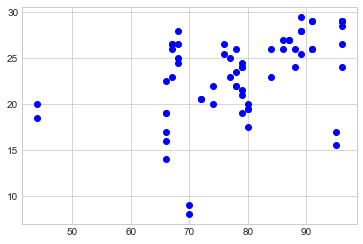

In [12]:
plt.plot(pigs_data['wj_brs'], wordlist_data['word_acc'], 'bo')
#title('initial reading score and word list improvements')

In [13]:
acc_grouped = passage_diff_data.groupby(['pigs_casecontrol'])['short_acc_diff', 'long_acc_diff'].mean()
acc_grouped_error = passage_diff_data.groupby(['pigs_casecontrol'])['short_acc_diff', 'long_acc_diff'].sem()

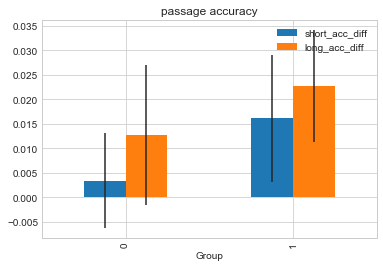

In [14]:
short_acc = acc_grouped.plot(kind='bar',style='seaborn-whitegrid', yerr=acc_grouped_error, title='passage accuracy')
short_acc.set_xlabel('Group')

In [15]:
rate_grouped = passage_diff_data.groupby(['pigs_casecontrol'])['short_rate_diff', 'long_rate_diff'].mean()
rate_grouped_error = passage_diff_data.groupby(['pigs_casecontrol'])['short_rate_diff', 'long_rate_diff'].sem()

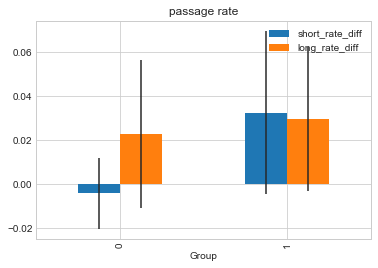

In [16]:
rate = rate_grouped.plot(kind='bar',style='seaborn-whitegrid', yerr=rate_grouped_error, title='passage rate')
rate.set_xlabel('Group')

([<matplotlib.text.Text at 0x1d22da14550>,
  <matplotlib.text.Text at 0x1d22da1b240>],)

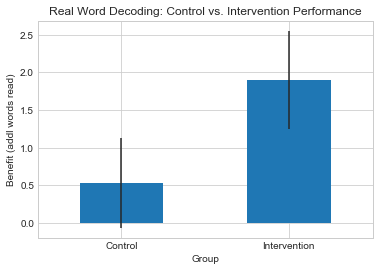

In [19]:
wordlist_acc_diff_grouped = wordlist_acc_diff_data.groupby(['pigs_casecontrol'])['word_acc_diff'].mean()
wl_acc_diff_grpd_error = wordlist_acc_diff_data.groupby(['pigs_casecontrol'])['word_acc_diff'].sem()
fig1 = wordlist_acc_diff_grouped.plot(kind='bar', yerr=wl_acc_diff_grpd_error, legend=False, title='Real Word Decoding: Control vs. Intervention Performance', rot=0)
fig1.set_xlabel('Group')
fig1.set_ylabel('Benefit (addl words read)')
fig1.set_xticklabels(['Control', 'Intervention']), 

([<matplotlib.text.Text at 0x1d22d9c3710>,
  <matplotlib.text.Text at 0x1d22dab3198>],)

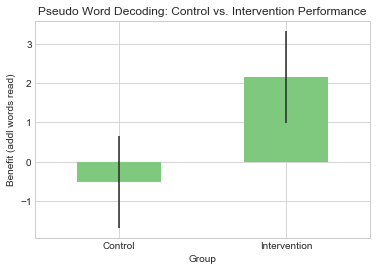

In [20]:
wordlist_acc_diff_grouped = wordlist_acc_diff_data.groupby(['pigs_casecontrol'])['pseudo_acc_diff'].mean()
wl_acc_diff_grpd_error = wordlist_acc_diff_data.groupby(['pigs_casecontrol'])['pseudo_acc_diff'].sem()
fig2 = wordlist_acc_diff_grouped.plot(kind='bar', yerr=wl_acc_diff_grpd_error, legend=False, colormap='Accent', title='Pseudo Word Decoding: Control vs. Intervention Performance',rot=0)
fig2.set_xlabel('Group')
fig2.set_ylabel('Benefit (addl words read)')
fig2.set_xticklabels(['Control', 'Intervention']), 

In [21]:
wordlist_acc_diff_data.groupby(['pigs_casecontrol'])['word_acc_diff']

In [22]:
from scipy.stats import ttest_ind

In [23]:
word_cntrl = wordlist_acc_diff_data['word_acc_diff'][wordlist_acc_diff_data['pigs_casecontrol'] == 0].dropna()
word_int = wordlist_acc_diff_data['word_acc_diff'][wordlist_acc_diff_data['pigs_casecontrol'] == 1].dropna()
pseudo_cntrl = wordlist_acc_diff_data['pseudo_acc_diff'][wordlist_acc_diff_data['pigs_casecontrol'] == 0].dropna()
pseudo_int = wordlist_acc_diff_data['pseudo_acc_diff'][wordlist_acc_diff_data['pigs_casecontrol'] == 1].dropna()

In [24]:
ttest_ind(word_int, word_cntrl)

Ttest_indResult(statistic=1.5482921961072604, pvalue=0.1320377935470663)

In [25]:
ttest_ind(pseudo_int, pseudo_cntrl)

Ttest_indResult(statistic=1.6152091318013624, pvalue=0.11673526494397686)

In [27]:
matlab_data.to_csv(home+'/Desktop/pigs_wordlist_data.csv')